In [1]:
from shap_explainer import ShapTreeExplainer
import pandas as pd
import numpy as np
import plotly
np.random.seed(0)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wine_quality/winequality-red.csv')
df['quality'] = df['quality'].astype(int)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: >

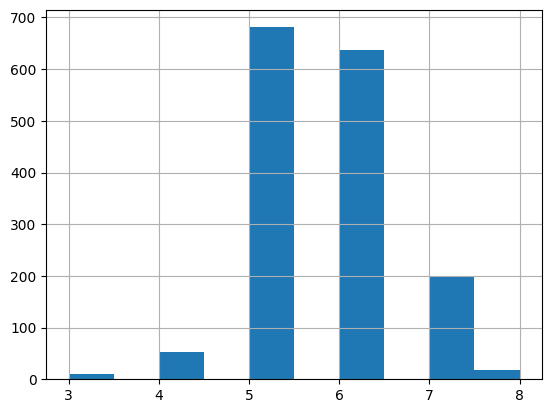

In [3]:
df['quality'].hist()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [6]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)  

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [7]:
explainer =  ShapTreeExplainer(model)
shap_values = explainer.explain(X_train)

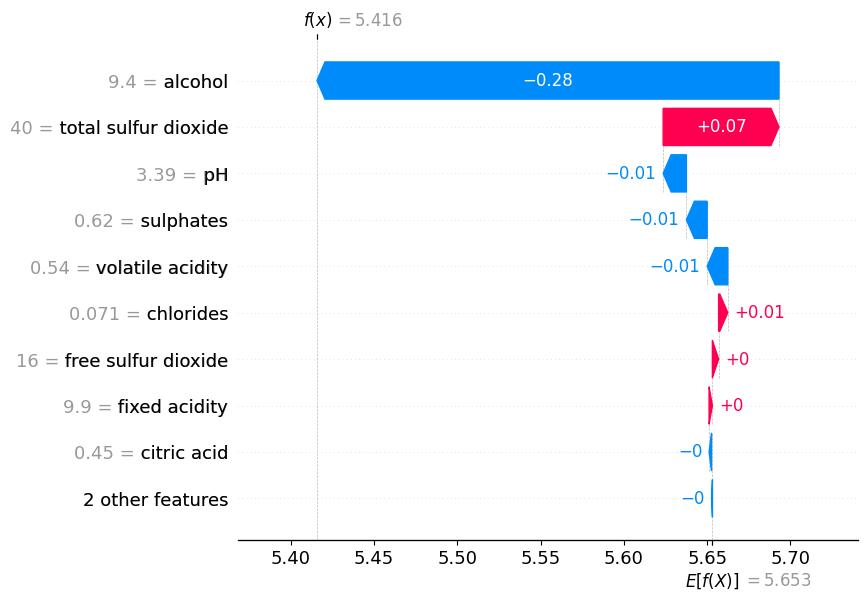

In [10]:
explainer.waterfall(shap_values[0])

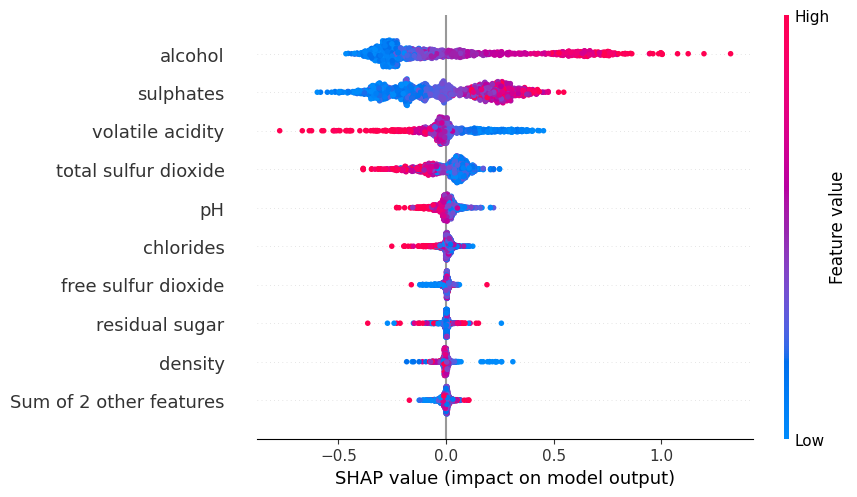

In [11]:
explainer.beeswarm(shap_values)

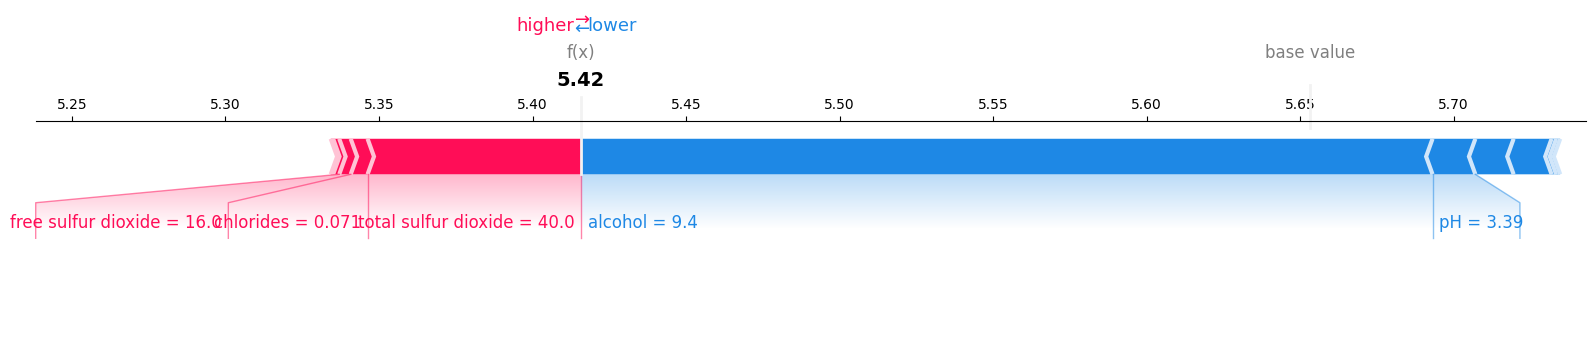

In [12]:
explainer.force(shap_values[0])

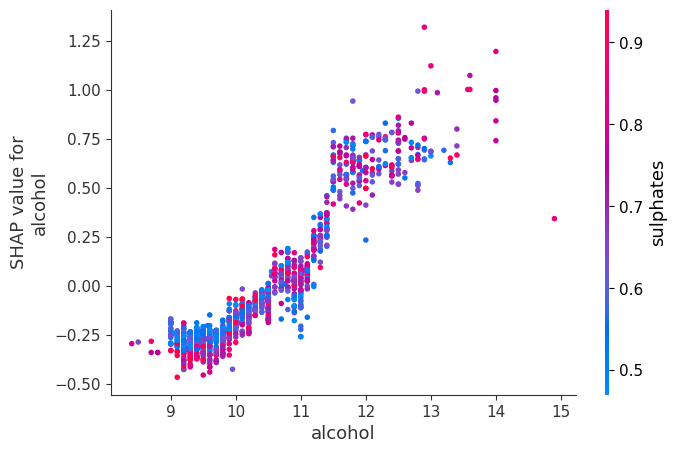

In [17]:
explainer.dependence_plot('alcohol', shap_values.values, X_train, interaction_index='auto')

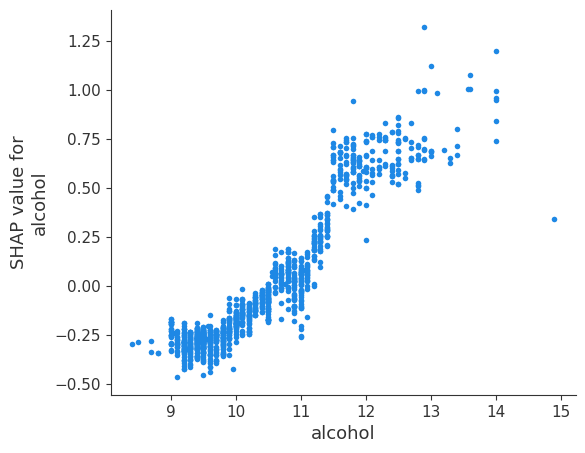

In [18]:
explainer.dependence_plot('alcohol', shap_values.values, X_train)

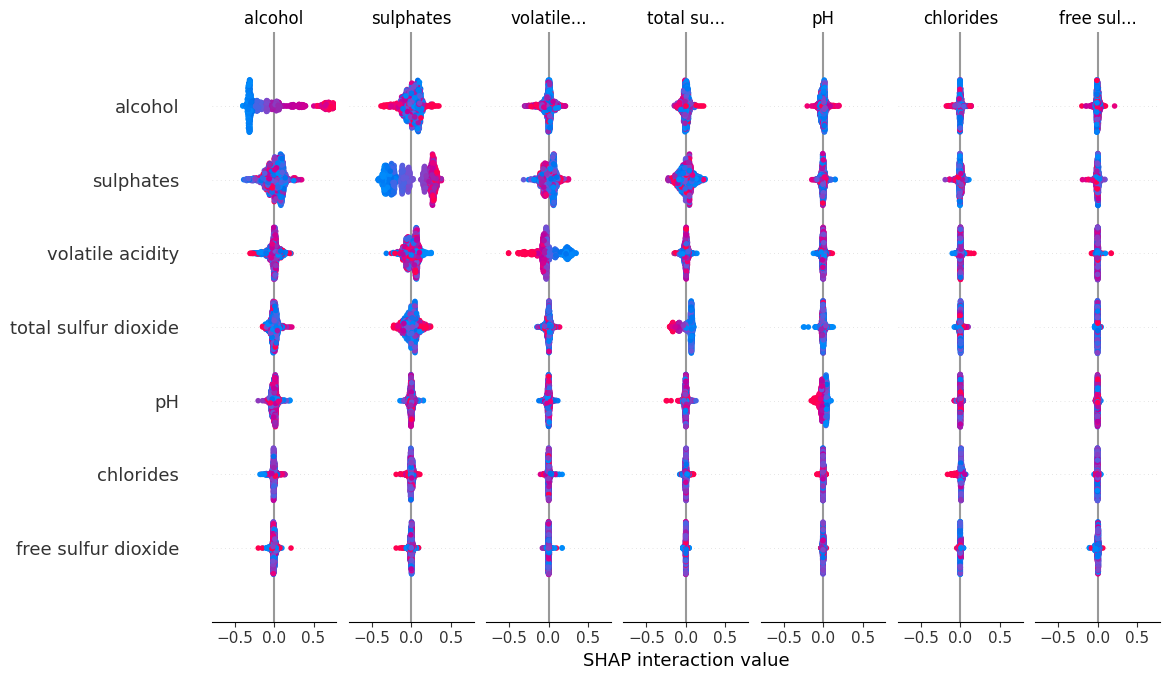

In [14]:
explainer.plot_interaction_values(X_train)

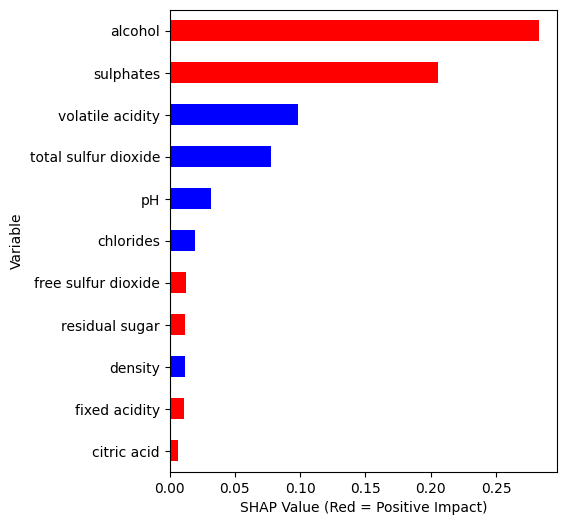

In [15]:
explainer.abs_shap(shap_values.values, X_train)